In [10]:
# !wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
# !wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

!curl -o mnist_0.jpg "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg"
!curl -o mnist_1.jpg "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   448  100   448    0     0   5526      0 --:--:-- --:--:-- --:--:--  5530
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   436  100   436    0     0   7336      0 --:--:-- --:--:-- --:--:--  7389


In [6]:
# !pip3 install matplotlib
!pip3 install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 10.9 MB/s eta 0:00:0000:0100:01


In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
print("torch version : {}".format(torch.__version__))

torch version : 2.4.0


In [11]:
digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg",cv2.IMREAD_GRAYSCALE )
digit_1_array_gray = cv2.imread("mnist_1.jpg",cv2.IMREAD_GRAYSCALE )

print("Image array shape: ",digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)} ; Max pixel value : {np.max(digit_0_array_og)}")
print(digit_0_array_og.shape, digit_0_array_gray.shape)

Image array shape:  (28, 28, 3)
Min pixel value:0 ; Max pixel value : 255
(28, 28, 3) (28, 28)


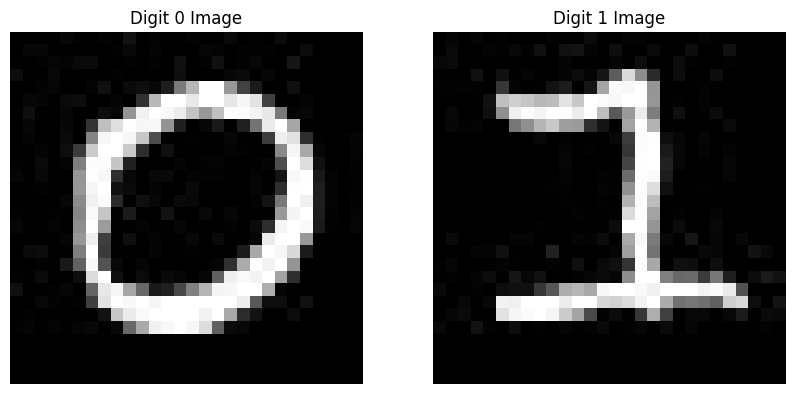

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap="gray", interpolation = 'none')
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

plt.show()

Shape of Normalised Digit 0 Tensor:  torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


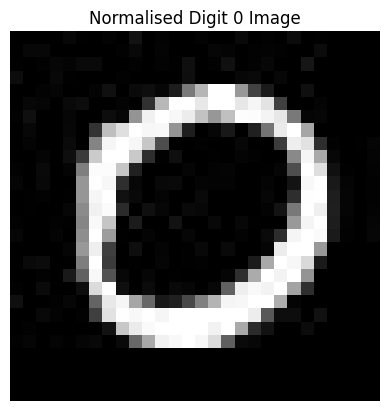

In [13]:
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print("Shape of Normalised Digit 0 Tensor: ", img_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}")

plt.imshow(img_tensor_0,cmap="gray")
plt.title("Normalised Digit 0 Image")
plt.axis('off')
plt.show()

In [16]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

# In PyTorch the forward pass of input images to the model is expected to have a batch_size > 1
print("Batch Tensor Shape:", batch_tensor.shape)

Batch Tensor Shape: torch.Size([2, 28, 28, 3])


In [17]:
batch_input = batch_tensor.permute(0,3,1,2)
print("Batch Tensor Shape:", batch_input.shape)

Batch Tensor Shape: torch.Size([2, 3, 28, 28])


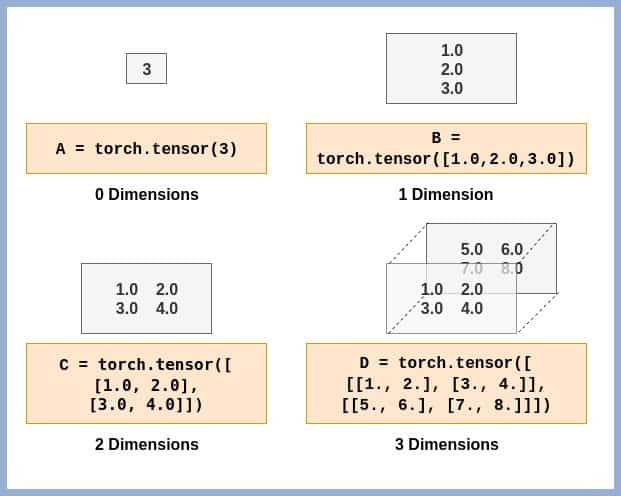

In [ ]:
# Zeros and Ones Tensor

a = torch.ones(5)
print(a)

b = torch.zeros(5)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0.])


In [19]:
c = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(c)

tensor([1., 2., 3., 4., 5.])


In [ ]:
# Tensors with Different Dimensions

d = torch.zeros(3,2)
print(d)

e = torch.ones(3,2)
print(e)

f = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(f)

# 3D Tensor
g = torch.tensor([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])
print(g)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [21]:
print(f.shape, e.shape, g.shape)

torch.Size([2, 2]) torch.Size([3, 2]) torch.Size([2, 2, 2])


In [ ]:
# Accessing Elements

print(c[2])

print(f[1,0])

print(f[1][0])

print(g[1,0,0])
print(g[1][0][0])

tensor(3.)
tensor(3.)
tensor(3.)
tensor(5.)
tensor(5.)


In [ ]:
# Slicing

print(f[:])

print(c[1:3])

print(c[:4])

print(f[0, :])

print(f[:,1])

tensor([[1., 2.],
        [3., 4.]])
tensor([2., 3.])
tensor([1., 2., 3., 4.])
tensor([1., 2.])
tensor([2., 4.])


In [25]:
# Data Type of Elements

int_tensor = torch.tensor([[1,2,3],[4,5,6]])
print(int_tensor.dtype)

int_tensor = torch.tensor([[1,2,3],[4.,5,6]])
print(int_tensor.dtype)
print(int_tensor)

float_tensor = torch.tensor([[1, 2, 3],[4., 5, 6]])
int_tensor = float_tensor.type(torch.int64)
print(int_tensor.dtype)
print(int_tensor)

torch.int64
torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


In [26]:
# Tensor to Numpy Array and vice-versa

# Tensor to Array
f_numpy = f.numpy()
print(f_numpy)

# Array to Tensor
h = np.array([[8,7,6,5],[4,3,2,1]])
h_tensor = torch.from_numpy(h)
print(h_tensor)

[[1. 2.]
 [3. 4.]]
tensor([[8, 7, 6, 5],
        [4, 3, 2, 1]])


In [27]:
# Tensor Operations

tensor1 = torch.tensor([[1,2,3],[4,5,6]])
tensor2 = torch.tensor([[-1,2,-3],[4,-5,6]])

print(tensor1+tensor2)
print(torch.add(tensor1,tensor2))

print(tensor1-tensor2)
print(torch.sub(tensor1,tensor2))

print(tensor1 * 2)
print(tensor1 * tensor2)

tensor3 = torch.tensor([[1,2],[3,4],[5,6]])
print(torch.mm(tensor1,tensor3))

print(tensor1/2)
print(tensor1/tensor2)

tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[22, 28],
        [49, 64]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


In [28]:
# Broadcasting

a = torch.tensor([1, 2, 3])
b = torch.tensor([4])
result = a + b # PyTorch broadcasts b to match the shape of a
print("Result of Broadcasting:\n",result)

b = torch.tensor([[4], [5], [6]])
result = a + b # PyTorch broadcasts both tensors to the common shape ([3, 3])
print("Shape: ", result.shape)
print("Result of Broadcasting:\n", result)

Result of Broadcasting:
 tensor([5, 6, 7])
Shape:  torch.Size([3, 3])
Result of Broadcasting:
 tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


In [ ]:
# CPU vs GPU Tensor
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='mps') # Metal Performance Shaders
print(tensor_cpu.device, tensor_gpu.device)

tensor_cpu = tensor_cpu * 5
tensor_gpu = tensor_gpu * 5
print(tensor_cpu)
print(tensor_gpu)

# Move GPU tensor to CPU
tensor_gpu_cpu = tensor_gpu.to(device='cpu')

# Move CPU tensor to GPU
tensor_cpu_gpu = tensor_cpu.to(device='mps')

print(tensor_cpu.device, tensor_gpu.device)

cpu mps:0
tensor([[ 5., 10.],
        [15., 20.],
        [25., 30.]])
tensor([[ 5., 10.],
        [15., 20.],
        [25., 30.]], device='mps:0')
cpu mps:0
